In [3]:
from collections import defaultdict
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
price = defaultdict(int)
for i, p in enumerate(original_price):
    price[i+1] = p
assert price[1] == 1#在assert后面跟上任意判断条件，如果断言失败则会抛出异常。

In [48]:
price[10]

30

# python 面向函数特点

In [3]:
def example(f, arg):
    return f(arg)

In [4]:
def f_add_ten(num):
    return num + 10

In [5]:
example(f_add_ten,100)

110

# 

In [23]:
called_time = defaultdict(int)

def get_call_times(f):
    result = f()
    print('function: {} called once! '.format(f.__name__))#f.__name__函数名称
    called_time[f.__name__] += 1
    
    return result

In [10]:
def some_funcion_1(): print('I am function 1')

In [14]:
get_call_times(some_funcion_1)

I am function 1
function: some_funcion_1 called once! 


In [15]:
called_time

defaultdict(int, {'some_funcion_1': 2})

# 

In [34]:
def r(n):   
    return max(
        [price[n]] + [r(i) + r(n-i) for i in range(1, n)]
    )

In [54]:
r(20)#没有加入 Dynamic Programming运算量太大

48

In [11]:
from functools import wraps

In [9]:
called_time_with_arg = defaultdict(int)

def get_call_time(f):
    """@param f is a function"""
    @wraps(f)#@wraps 让我们被装饰的函数保持自己的一些私有属性
    def wrap(n):
        """Haha I am warp"""
        #print('I can count')
        result = f(n)
        called_time_with_arg[(f.__name__, n)] += 1
        return result
    return wrap

In [24]:
def add_ten(n): return n + 10

In [25]:
add_ten(10)

20

In [26]:
add_ten = get_call_time(add_ten)

In [27]:
add_ten(10)

I can count


20

In [28]:
@get_call_time#装饰器的作用，相当于add_twenty = get_call_time(add_twenty)
def add_twenty(n): 
    return n + 20

In [29]:
add_twenty(9)

I can count


29

# 

In [97]:
called_time_with_arg = defaultdict(int)

In [98]:
solution = {}

In [99]:
@get_call_time
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    max_price, max_split = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)],  key=lambda x: x[0]#x:x[]求最大值方式按照中括号[]里面的维度，[0]按照第一维，[1]按照第二维。
    )

    solution[n] = (n - max_split, max_split)
    
    return max_price

In [100]:
r(11)

31

In [101]:
called_time_with_arg

defaultdict(int,
            {('r', 1): 39366,
             ('r', 2): 13122,
             ('r', 3): 4374,
             ('r', 4): 1458,
             ('r', 5): 486,
             ('r', 6): 162,
             ('r', 7): 54,
             ('r', 8): 18,
             ('r', 9): 6,
             ('r', 10): 2,
             ('r', 11): 1})

In [103]:
from collections import Counter
Counter(called_time_with_arg).most_common()

[(('r', 1), 39366),
 (('r', 2), 13122),
 (('r', 3), 4374),
 (('r', 4), 1458),
 (('r', 5), 486),
 (('r', 6), 162),
 (('r', 7), 54),
 (('r', 8), 18),
 (('r', 9), 6),
 (('r', 10), 2),
 (('r', 11), 1)]

In [78]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (10, 1)}

In [62]:
def parse_solution(n):
    left_split, right_split = solution[n]
    
    if right_split == 0: return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [81]:
r(11)

31

In [82]:
parse_solution(11)

[10, 1]

# Dynamic Programming

In [4]:
def memo(f): #查表法
    memo.already_computed = {}
    @wraps(f)
    def _wrap(arg):
        result = None
        
        if arg in memo.already_computed: 
            result = memo.already_computed[arg]
        else:
            result = f(arg)
            memo.already_computed[arg] = result
        
        return result
    
    return _wrap

In [5]:
called_time_with_arg_dynamic = defaultdict(int)

In [6]:
solution_dynamic= {}

In [7]:
memo.already_computed = {}#表

In [14]:
@memo
@get_call_time
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    max_price, max_split = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )

    solution_dynamic[n] = (n - max_split, max_split)
    
    return max_price

In [15]:
r(60)

180

In [19]:
solution_dynamic

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (10, 1),
 12: (10, 2),
 13: (10, 3),
 14: (12, 2),
 15: (13, 2),
 16: (10, 6),
 17: (16, 1),
 18: (16, 2),
 19: (16, 3),
 20: (10, 10),
 21: (20, 1),
 22: (20, 2),
 23: (20, 3),
 24: (22, 2),
 25: (23, 2),
 26: (20, 6),
 27: (26, 1),
 28: (26, 2),
 29: (26, 3),
 30: (20, 10),
 31: (30, 1),
 32: (30, 2),
 33: (30, 3),
 34: (32, 2),
 35: (33, 2),
 36: (30, 6),
 37: (36, 1),
 38: (36, 2),
 39: (36, 3),
 40: (30, 10),
 41: (40, 1),
 42: (40, 2),
 43: (40, 3),
 44: (42, 2),
 45: (43, 2),
 46: (40, 6),
 47: (46, 1),
 48: (46, 2),
 49: (46, 3),
 50: (40, 10),
 51: (50, 1),
 52: (50, 2),
 53: (50, 3),
 54: (52, 2),
 55: (53, 2),
 56: (50, 6),
 57: (56, 1),
 58: (56, 2),
 59: (56, 3),
 60: (50, 10)}

In [20]:
memo.already_computed

{1: 1,
 2: 5,
 3: 8,
 4: 10,
 5: 13,
 6: 17,
 7: 18,
 8: 22,
 9: 25,
 10: 30,
 11: 31,
 12: 35,
 13: 38,
 14: 40,
 15: 43,
 16: 47,
 17: 48,
 18: 52,
 19: 55,
 20: 60,
 21: 61,
 22: 65,
 23: 68,
 24: 70,
 25: 73,
 26: 77,
 27: 78,
 28: 82,
 29: 85,
 30: 90,
 31: 91,
 32: 95,
 33: 98,
 34: 100,
 35: 103,
 36: 107,
 37: 108,
 38: 112,
 39: 115,
 40: 120,
 41: 121,
 42: 125,
 43: 128,
 44: 130,
 45: 133,
 46: 137,
 47: 138,
 48: 142,
 49: 145,
 50: 150,
 51: 151,
 52: 155,
 53: 158,
 54: 160,
 55: 163,
 56: 167,
 57: 168,
 58: 172,
 59: 175,
 60: 180}

In [21]:
called_time_with_arg

defaultdict(int,
            {('r', 1): 1,
             ('r', 2): 1,
             ('r', 3): 1,
             ('r', 4): 1,
             ('r', 5): 1,
             ('r', 6): 1,
             ('r', 7): 1,
             ('r', 8): 1,
             ('r', 9): 1,
             ('r', 10): 1,
             ('r', 11): 1,
             ('r', 12): 1,
             ('r', 13): 1,
             ('r', 14): 1,
             ('r', 15): 1,
             ('r', 16): 1,
             ('r', 17): 1,
             ('r', 18): 1,
             ('r', 19): 1,
             ('r', 20): 1,
             ('r', 21): 1,
             ('r', 22): 1,
             ('r', 23): 1,
             ('r', 24): 1,
             ('r', 25): 1,
             ('r', 26): 1,
             ('r', 27): 1,
             ('r', 28): 1,
             ('r', 29): 1,
             ('r', 30): 1,
             ('r', 31): 1,
             ('r', 32): 1,
             ('r', 33): 1,
             ('r', 34): 1,
             ('r', 35): 1,
             ('r', 36): 1,
             ('r', 3

# k-person-salesman problem:

In [1]:
import random
import matplotlib.pylab as plt
from collections import defaultdict

In [2]:
latitudes = [random.randint(-100, 100) for _ in range(70)]
longitude = [random.randint(-100, 100) for _ in range(70)]

In [3]:
point_location = {}#defaultdict(list)#？？为什么有len(point_location)多2

In [4]:
def point_location_create(latitudes,longitude):
    for i in range(len(latitudes)):
        point_location[i+1] = (latitudes[i],longitude[i])
    return point_location

In [5]:
point_location = point_location_create(latitudes,longitude)

In [6]:
point_location 

{1: (29, 98),
 2: (-12, -71),
 3: (-97, -44),
 4: (81, -81),
 5: (-68, 29),
 6: (20, -39),
 7: (-9, -1),
 8: (62, 60),
 9: (22, 90),
 10: (31, 52),
 11: (-78, 17),
 12: (2, 26),
 13: (-43, -61),
 14: (-98, 74),
 15: (-55, 32),
 16: (82, -10),
 17: (77, 19),
 18: (-39, 60),
 19: (-85, -63),
 20: (-69, 66),
 21: (-64, 25),
 22: (-96, -55),
 23: (-38, -100),
 24: (-78, -56),
 25: (-66, -48),
 26: (26, -73),
 27: (-92, -88),
 28: (99, -72),
 29: (35, -1),
 30: (57, 24),
 31: (36, -35),
 32: (-53, -17),
 33: (89, -70),
 34: (81, 56),
 35: (-26, 30),
 36: (39, -25),
 37: (-93, -29),
 38: (-14, -43),
 39: (92, 66),
 40: (61, 20),
 41: (-62, 79),
 42: (-2, 50),
 43: (5, -61),
 44: (-67, -55),
 45: (10, -86),
 46: (99, 64),
 47: (76, -1),
 48: (-90, 72),
 49: (21, 98),
 50: (53, 65),
 51: (-65, -39),
 52: (-53, -4),
 53: (91, 69),
 54: (99, -8),
 55: (-90, -24),
 56: (-21, 8),
 57: (81, -11),
 58: (91, -19),
 59: (-37, -28),
 60: (-1, -38),
 61: (-30, -76),
 62: (36, -40),
 63: (59, -77),
 64: 

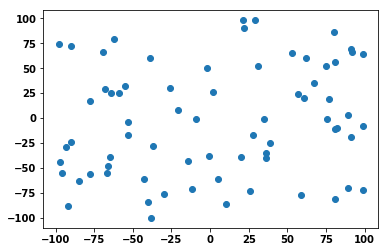

In [7]:
plt.scatter(latitudes, longitude)

In [8]:
#point_location = point_location.pop(1)

In [1144]:
#del point_location[1]

In [1145]:
len(point_location)

70

In [1146]:
def geo_distance(origin, next):
    lat1, lon1 = origin
    lat2, lon2 = next
    distance = (abs( lat2 - lat1)**2 + abs( lon2 - lon1)**2)**0.5 
    return distance 

In [1147]:
geo_distance((-100, 89), (34, 86))

134.03357788255897

In [1148]:
origin = point_location[1]
for i in point_location:
    print(i)
    distance = geo_distance(origin,point_location[i])
    print(distance)

1
0.0
2
170.84788555905513
3
46.2709412050371
4
84.0
5
50.15974481593781
6
115.69356075426151
7
87.23531395025755
8
169.5670958647343
9
150.65523555456014
10
193.13207915827965
11
153.16984037335808
12
83.00602387778854
13
141.03900169811186
14
164.76953601925328
15
36.40054944640259
16
211.64593074283286
17
156.40012787718558
18
148.33745312630927
19
158.79546593023366
20
136.3084736911099
21
129.9730741346068
22
138.9280389266328
23
45.880278987817846
24
38.897300677553446
25
139.38794782907166
26
122.78436382536663
27
162.18816233005415
28
32.802438933713454
29
170.98830369355676
30
148.4048516727132
31
66.09841147864296
32
60.03332407921454
33
146.44111444536333
34
126.17844506887855
35
85.16454661418682
36
53.33854141237835
37
143.85061696079026
38
160.89748288895012
39
114.93476410555685
40
55.46169849544819
41
38.8329756778952
42
116.15506876585283
43
128.76334882255898
44
171.97674261364529
45
8.602325267042627
46
125.89678312014172
47
175.04570831642803
48
50.0
49
162.48384535

#从起始origin点出发经过所有点，最短距离

In [1149]:
def a (origin,point_location):
    distance_min_all = 0
    for i in range (len(point_location)-1):
        point_location, origin, distance_min =  b (origin,point_location)
        distance_min_all += distance_min
    return distance_min_all

In [1150]:
def b (origin,point_location):
    distance = {}
    del point_location[find_key(origin)]
    for i in point_location:
            distance[i] = geo_distance(origin,point_location[i])
            #last_point = point_location[i]
            print(distance)
            
    g,distance_min = min(distance.items(), key=lambda x: x[1])
    print(distance_min)
    print(g)
    origin = point_location[g]
    print(origin)
    #del point_location[g]#在所有点钟删掉前一点
    print(point_location)
    return point_location,origin,distance_min

In [1151]:
a(point_location[1],point_location)

{2: 170.84788555905513}
{2: 170.84788555905513, 3: 46.2709412050371}
{2: 170.84788555905513, 3: 46.2709412050371, 4: 84.0}
{2: 170.84788555905513, 3: 46.2709412050371, 4: 84.0, 5: 50.15974481593781}
{2: 170.84788555905513, 3: 46.2709412050371, 4: 84.0, 5: 50.15974481593781, 6: 115.69356075426151}
{2: 170.84788555905513, 3: 46.2709412050371, 4: 84.0, 5: 50.15974481593781, 6: 115.69356075426151, 7: 87.23531395025755}
{2: 170.84788555905513, 3: 46.2709412050371, 4: 84.0, 5: 50.15974481593781, 6: 115.69356075426151, 7: 87.23531395025755, 8: 169.5670958647343}
{2: 170.84788555905513, 3: 46.2709412050371, 4: 84.0, 5: 50.15974481593781, 6: 115.69356075426151, 7: 87.23531395025755, 8: 169.5670958647343, 9: 150.65523555456014}
{2: 170.84788555905513, 3: 46.2709412050371, 4: 84.0, 5: 50.15974481593781, 6: 115.69356075426151, 7: 87.23531395025755, 8: 169.5670958647343, 9: 150.65523555456014, 10: 193.13207915827965}
{2: 170.84788555905513, 3: 46.2709412050371, 4: 84.0, 5: 50.15974481593781, 6: 115

{2: 144.03124660989366, 3: 72.91776189653656, 8: 148.36778626103444, 9: 118.3427226321923, 10: 160.52414148656894, 11: 120.56948204251356, 13: 110.63453348751464, 14: 132.24598292575845, 16: 178.86866690396056, 17: 123.60016181219181, 18: 122.40914998479485}
{2: 144.03124660989366, 3: 72.91776189653656, 8: 148.36778626103444, 9: 118.3427226321923, 10: 160.52414148656894, 11: 120.56948204251356, 13: 110.63453348751464, 14: 132.24598292575845, 16: 178.86866690396056, 17: 123.60016181219181, 18: 122.40914998479485, 19: 126.0634760745554}
{2: 144.03124660989366, 3: 72.91776189653656, 8: 148.36778626103444, 9: 118.3427226321923, 10: 160.52414148656894, 11: 120.56948204251356, 13: 110.63453348751464, 14: 132.24598292575845, 16: 178.86866690396056, 17: 123.60016181219181, 18: 122.40914998479485, 19: 126.0634760745554, 22: 107.96758772891057}
{2: 144.03124660989366, 3: 72.91776189653656, 8: 148.36778626103444, 9: 118.3427226321923, 10: 160.52414148656894, 11: 120.56948204251356, 13: 110.634533

(-84, -35)
{3: (86, 75), 8: (63, -98), 13: (-4, -64), 22: (-9, -60), 29: (66, -99), 32: (100, 72), 34: (1, -50), 41: (78, 78), 44: (66, -100), 49: (-84, -35), 51: (100, 10), 54: (-20, -50), 59: (85, 39), 64: (-10, -21), 66: (-27, -40)}
{3: 202.48456731316588}
{3: 202.48456731316588, 8: 159.93123522314207}
{3: 202.48456731316588, 8: 159.93123522314207, 13: 85.09406559801923}
{3: 202.48456731316588, 8: 159.93123522314207, 13: 85.09406559801923, 22: 79.05694150420949}
{3: 202.48456731316588, 8: 159.93123522314207, 13: 85.09406559801923, 22: 79.05694150420949, 29: 163.0828010551695}
{3: 202.48456731316588, 8: 159.93123522314207, 13: 85.09406559801923, 22: 79.05694150420949, 29: 163.0828010551695, 32: 212.8497122384712}
{3: 202.48456731316588, 8: 159.93123522314207, 13: 85.09406559801923, 22: 79.05694150420949, 29: 163.0828010551695, 32: 212.8497122384712, 34: 86.31338250816034}
{3: 202.48456731316588, 8: 159.93123522314207, 13: 85.09406559801923, 22: 79.05694150420949, 29: 163.082801055169

1459.4696893135351

查字典键

In [846]:
def find_key(next_min):
    key_list =[ ]
    value_list=[ ]
    for key,value in point_location.items():
        key_list.append(key)
        value_list.append(value)

    if next_min in value_list:
        get_value_index=value_list.index(next_min)
        #print ("你要查询的值对应的键为：%s"%key_list[get_value_index])
        return key_list[get_value_index]
    else:
        print ("你要查询的值不存在")

In [847]:
find_key((55, 65))

你要查询的值不存在


# 给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?例如：

In [4]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [5]:
import matplotlib.pyplot as plt

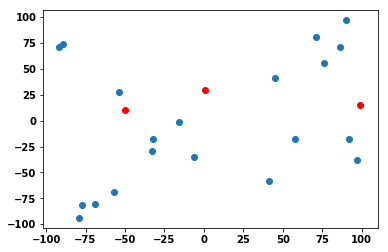

In [6]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')